In [1]:
import pandas as pd
import numpy as np
import world_bank_data as wb

import plotly
import plotly.offline as offline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
countries = wb.get_countries()
countries= countries.loc[countries['region'] != 'Aggregates']
countries.head()

iso2Code         name                      region  \
id                                                      
ABW       AW        Aruba  Latin America & Caribbean    
AFG       AF  Afghanistan                  South Asia   
AGO       AO       Angola         Sub-Saharan Africa    
ALB       AL      Albania       Europe & Central Asia   
AND       AD      Andorra       Europe & Central Asia   

                                       adminregion          incomeLevel  \
id                                                                        
ABW                                                         High income   
AFG                                     South Asia           Low income   
AGO     Sub-Saharan Africa (excluding high income)  Lower middle income   
ALB  Europe & Central Asia (excluding high income)  Upper middle income   
AND                                                         High income   

        lendingType       capitalCity  longitude  latitude  
id                                                          
ABW  Not classified        Oranjestad   -70.0167  12.51670  
AFG             IDA             Kabul    69.1761  34.52280  
AGO            IBRD            Luanda    13.2420  -8.81155  
ALB            IBRD            Tirane    19.8172  41.33170  
AND  Not classified  Andorra la Vella     1.5218  42.50750

In [38]:
unemployment = wb.get_series('SL.UEM.TOTL.ZS',simplify_index=True, id_or_value='id', mrv=1)
unemployment[(unemployment.notnull())]

population = wb.get_series('SP.POP.TOTL', simplify_index= True, mrv=1, id_or_value= 'id')

gdp = wb.get_series('NY.GDP.MKTP.CD', simplify_index= True, mrv=1, id_or_value= 'id')

In [42]:
df = countries[['region', 'name', 'incomeLevel']].rename(columns={'name': 'country'})
df['unemployment'] = unemployment
df['population'] = population
df['gdp'] = gdp

df.head()

region      country          incomeLevel  \
id                                                                  
ABW  Latin America & Caribbean         Aruba          High income   
AFG                  South Asia  Afghanistan           Low income   
AGO         Sub-Saharan Africa        Angola  Lower middle income   
ALB       Europe & Central Asia      Albania  Upper middle income   
AND       Europe & Central Asia      Andorra          High income   

     unemployment  population           gdp  
id                                           
ABW           NaN    106314.0           NaN  
AFG         11.73  38041754.0  1.929110e+10  
AGO          7.70  31825295.0  8.881570e+10  
ALB         11.70   2854191.0  1.527918e+10  
AND           NaN     77142.0  3.154058e+09

In [53]:
df.groupby(['region']).mean()

unemployment    population           gdp
region                                                              
East Asia & Pacific             4.723104  6.262263e+07  9.053582e+11
Europe & Central Asia           7.997755  1.588173e+07  4.635255e+11
Latin America & Caribbean      10.353548  1.539121e+07  1.526357e+11
Middle East & North Africa     10.567143  2.174797e+07  1.716882e+11
North America                   8.895000  1.219642e+08  7.725712e+12
South Asia                      6.123750  2.294721e+08  4.489796e+11
Sub-Saharan Africa              8.345106  2.347789e+07  3.887186e+10

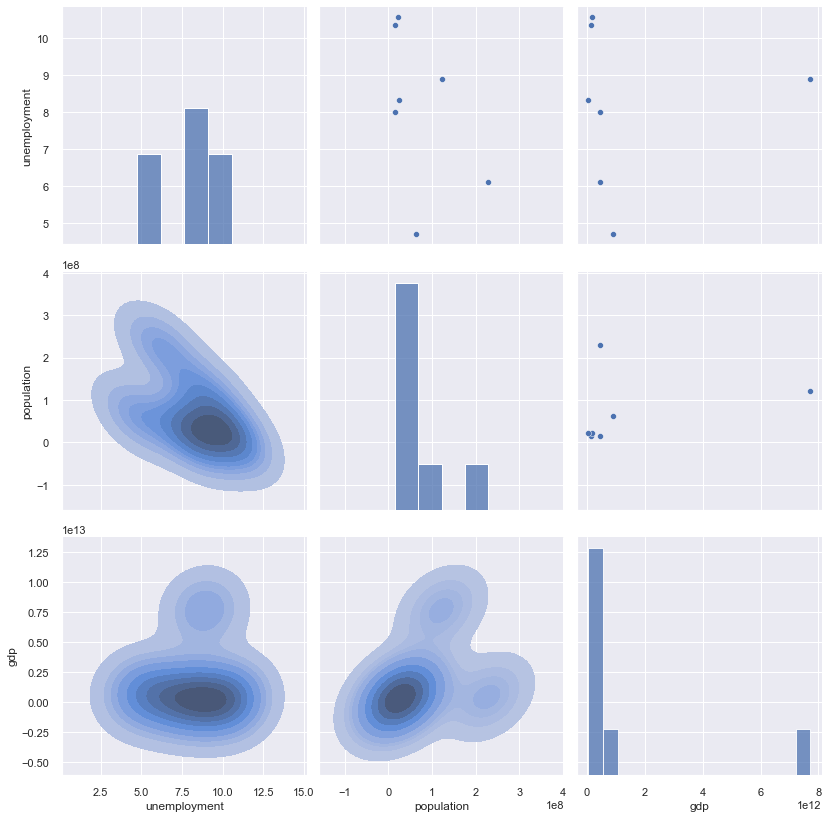

In [55]:
ax= sns.pairplot(data= df.groupby(['region']).mean())
ax.fig.set_size_inches(12,12)
ax.map_lower(sns.kdeplot, shade=True)

'gdp'

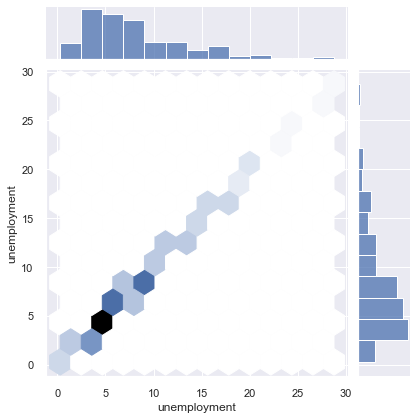

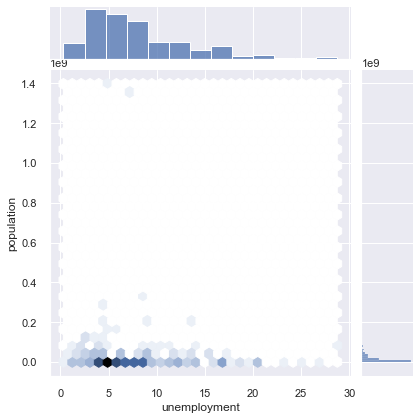

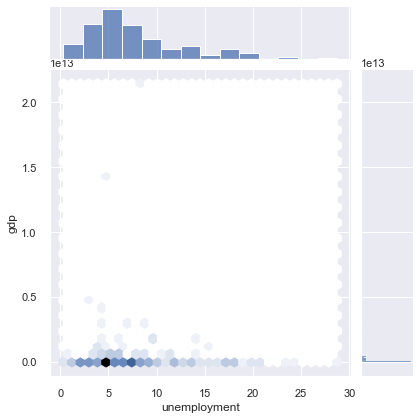

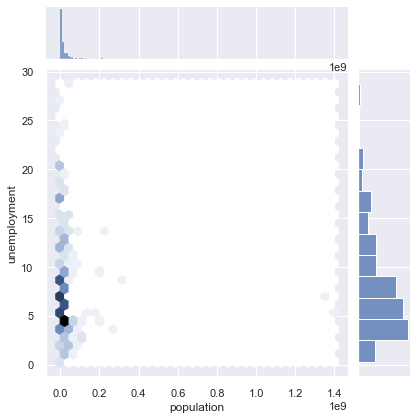

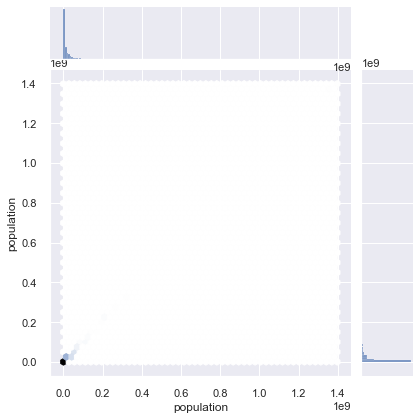

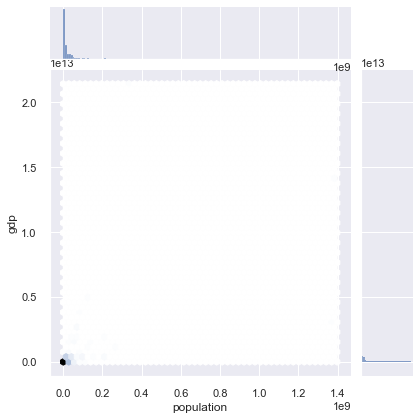

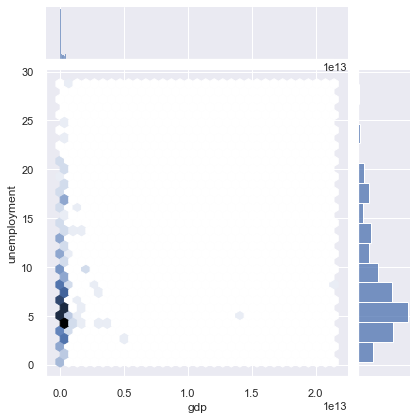

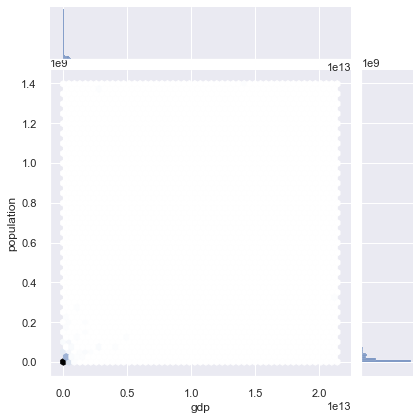

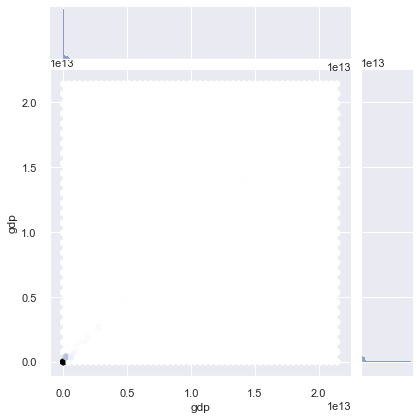

In [58]:
for x in df.groupby(['region']).mean().columns:
    for y in df.groupby(['region']).mean().columns:
        sns.jointplot(data= df, x=x, y=y, kind='hex')